In [119]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('dark')

In [120]:
path = "output/qubit_4_t_32/"

In [121]:
def get_param():
    gp_data = np.load(path+"Gaussian_Process.npy")
    return gp_data[...,1:]
param = get_param()

In [122]:
def get_id(p):
    for i in range(param.shape[0]):
        if (p == param[i]).all():
            return i
    assert(0)

In [123]:
def process_mb(round):
    mb_data = np.load(path+"Multi-arm_Bandit_{}.npy".format(round))
    id_map = []
    for i in range(mb_data.shape[0]):
        id_map.append(get_id(mb_data[i][1:]))
    return id_map

In [124]:
mb_round_total = 10
mb_id_map = {}
for i in range(1, mb_round_total+1):
    mb_id_map[i] = process_mb(i)

In [125]:
mb_round_visible = [1,2,5,10]
mb_color_map = {
    1: "#f4e090",
    2: "#f4d35e",
    5: "#ee964b",
    10: "#f95738"
}

def plot():
    plt.figure(figsize=(12,9))
    acc = np.load(path+"Gaussian_Process.npy")[...,0]
    best_acc = np.zeros_like(acc)
    best_acc[0] = acc[0]
    for i in range(1, acc.shape[0]):
        best_acc[i] = max(best_acc[i-1], acc[i])
    plt.scatter(range(acc.shape[0]), acc, s=2, color = '#0d3b66')
    plt.plot(range(acc.shape[0]), best_acc, label="GP-best", color = '#0d3b66')
    for i in mb_round_visible:
        plt.plot(range(acc.shape[0]),np.min(np.load(path+"Multi-arm_Bandit_{}.npy".format(i))[...,0])*np.ones((acc.shape[0], )), label = "MB-round {}".format(i), color = mb_color_map[i])
    plt.legend()
    plt.ylim(bottom=0)
    plt.xlabel("GP iteration")
    plt.ylabel("success probability")
    plt.title("3SAT, n=4, m=17")

In [126]:

np.min(np.load(path+"Multi-arm_Bandit_{}.npy".format(1))[...,0])

0.08375707131729657

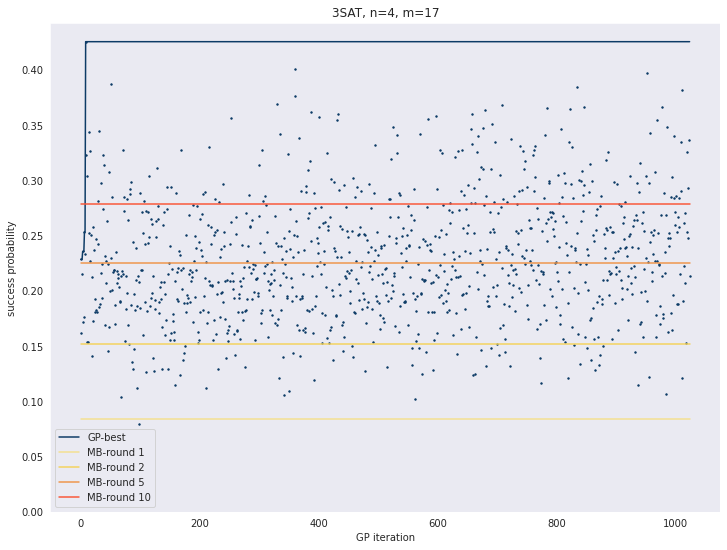

In [127]:
plot()
plt.savefig(path+"out.pdf")